#   
<span style="font-family:Arial; font-weight:Bold; font-size:2.3em; color:#00b3e5;"> Text Summarizer

#####      
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> loading libraries  

In [1]:
import numpy  as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import re #, string, unicodedata
#from   bs4 import BeautifulSoup

#from   textblob  import TextBlob, Word
from   wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#import spacy

#from sklearn.svm           import SVC
#from sklearn.naive_bayes   import MultinomialNB
#from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model  import LogisticRegression, SGDClassifier
from sklearn               import model_selection, preprocessing, naive_bayes, ensemble 
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.metrics       import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
import nltk   # pip install --upgrade nltk

nltk.download('punkt')
from nltk.probability      import FreqDist
#from nltk.tokenize.toktok import ToktokTokenizer
from nltk.tokenize         import word_tokenize, sent_tokenize

nltk.download('stopwords') 
from nltk.corpus           import stopwords

nltk.download('wordnet')
from nltk.stem             import WordNetLemmatizer 

#from nltk.stem            import LancasterStemmer 
#from nltk.stem.porter     import PorterStemmer

[nltk_data] Downloading package punkt to C:\Users\EZ-
[nltk_data]     Tech\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\EZ-
[nltk_data]     Tech\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\EZ-
[nltk_data]     Tech\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#####      
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:deeppink;"> loading dataset

In [3]:
with open('Story_3.txt', 'r') as file:
    text = file.read().strip().replace('\n',' ').replace(';','.')
    
Clean_Text = ''
for word in word_tokenize(text):
    Clean_Text = Clean_Text + ' ' + word
text = Clean_Text

text

" THE PROBLEM OF THOR BRIDGE Arthur Conan Doyle Somewhere in the vaults of the bank of Cox and Co. , at Charing Cross , there is a travel-worn and battered tin dispatch-box with my name , John H. Watson , M.D. , Late Indian Army , painted upon the lid . It is crammed with papers , nearly all of which are records of cases to illustrate the curious problems which Mr. Sherlock Holmes had at various times to examine . Some , and not the least interesting , were complete failures , and as such will hardly bear narrating , since no final explanation is forthcoming . A problem without a solution may interest the student , but can hardly fail to annoy the casual reader . Among these unfinished tales is that of Mr. James Phillimore , who , stepping back into his own house to get his umbrella , was never more seen in this world . No less remarkable is that of the cutter Alicia , which sailed one spring morning into a small patch of mist from where she never again emerged , nor was anything furth

In [4]:
data = pd.DataFrame( )
data['text'] = [text]
data.head()

,text
0,THE PROBLEM OF THOR BRIDGE Arthur Conan Doyle...


#####      
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> NLP Preprocessing

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Remove New Lines

In [5]:
# removing new lines
def remove_new_lines(text): return re.sub('[\n]',' ', text)
data['text'] = data['text'].apply(remove_new_lines)

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Remove Punctuations

In [6]:
# removing punctuations
def remove_punctuations(text): return re.sub('[^a-zA-Z]',' ', text)
data['text'] = data['text'].apply(remove_punctuations)

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Converting to LowerCase

In [7]:
# converting text to lower_case
def into_lower(text): return text.lower()
data['text'] = data['text'].apply(into_lower)

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Set & Remove Stop_Words

<span style="font-family:Arial; font-weight:Bold; font-size:1.2em; color:#00b3e5;"> Setting Stop_Words

In [8]:
# Setting English StopWords
stop_words = set( stopwords.words('english') )
new_words  = [ 'some','one','like' ,'br', 'could','would','get','make','really','see',
               'well','much','good','great','first','last','people','also','bad','worst' ,'may','thing',
               'make','go','think','know','watch','look','many','said','say','mr','new','take','told','back' 
               'mr', 'mrs', 'upon', 'sir', 'yes', 'no', 'u', 's', 'k', 'n', 'next', 'half', 'quarter', 'third', 'late',
               'ago', 'before', 'after', 'behind', 'back', 'front', 'oh', 'yet', 'indeed', 'due'
             ] 
stop_words = stop_words.union(new_words)

<span style="font-family:Arial; font-weight:Bold; font-size:1.2em; color:#00b3e5;"> Removing Stop_Words

In [9]:
def remove_stop_words(text):
    Clean = []
    for word in text.split():
        if word.strip() not in stop_words:
            Clean.append(word.strip()) 
    return ' '.join( Clean )

data['text'] = data['text'].apply( remove_stop_words )
data['text'][0][:300]

'problem thor bridge arthur conan doyle somewhere vaults bank cox co charing cross travel worn battered tin dispatch box name john h watson indian army painted lid crammed papers nearly records cases illustrate curious problems sherlock holmes various times examine least interesting complete failures'

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Lemmatizing

In [10]:
# Lemmatizing 
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    Clean = []
    for word in text.split():
        w = word
        w = lemmatizer.lemmatize(w, pos="n")   # nouns
        w = lemmatizer.lemmatize(w, pos="v")   # verbs
        w = lemmatizer.lemmatize(w, pos="a")   # adj
        w = lemmatizer.lemmatize(w, pos="r")   # adv
        w = lemmatizer.lemmatize(w, pos="s")   # satellite adj
        Clean.append( w )
    return ' '.join( Clean )

data['text'] = data['text'].apply(lemmatize_text)
data['text'][0][:300]

'problem thor bridge arthur conan doyle somewhere vault bank cox co char cross travel wear batter tin dispatch box name john h watson indian army paint lid cram paper nearly record case illustrate curious problem sherlock holmes various time examine least interest complete failure hardly bear narrate'

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Stemming
 - Faster but less accurate than Lemmatizer

In [11]:
# Stemming
''' 
Stemmer = PorterStemmer()

def stem_text(text):
    Clean = []
    for word in text.split():
        Clean.append( Stemmer.stem(word) )
    return ' '.join( Clean )

data['text'] = data['text'].apply(stem_text)
data.head()
''' 
pass

<span style="font-family:Arial; font-weight:Bold; font-size:1.2em; color:#00b3e5;"> Removing Stop_Words

In [12]:
data['text'] = data['text'].apply( remove_stop_words )
data['text'][0][:300]

'problem thor bridge arthur conan doyle somewhere vault bank cox co char cross travel wear batter tin dispatch box name john h watson indian army paint lid cram paper nearly record case illustrate curious problem sherlock holmes various time examine least interest complete failure hardly bear narrate'

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Bag of Words (List)

In [13]:
def bag_of_words_maker(df,ft):
    texts = df[ft]
    bag   = []
    for text in texts:
        for word in text.split():
            bag.append( word )
    return bag

bag_of_words = bag_of_words_maker( data, 'text' )
bag_of_words[:5]

['problem', 'thor', 'bridge', 'arthur', 'conan']

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Bag of Words (DataFrame)

In [14]:
bag_of_words = pd.DataFrame( bag_of_words, columns=['word'] )
bag_of_words.head(3)

,word
0,problem
1,thor
2,bridge


<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Words Count (DataFrame)

In [15]:
words_count         = pd.DataFrame( bag_of_words[ 'word' ].value_counts() )
words_count['word'] = words_count.index
words_count.index   = range( words_count.shape[0] )
words_count.head(5)

,count,word
0,59,holmes
1,29,gibson
2,27,watson
3,27,come
4,26,woman


<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Visualizing Top Words

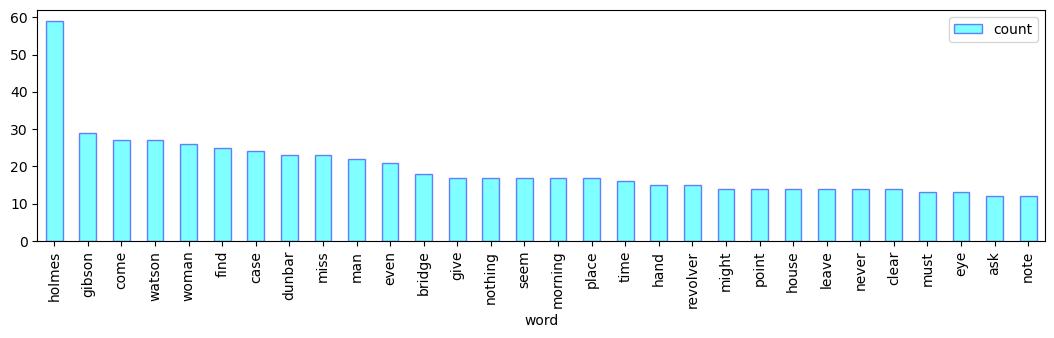

In [16]:
df = words_count
cat, sclr = 'word', 'count'

df.groupby(by=[cat])[sclr].median().reset_index().sort_values([sclr],ascending=False).head(30).\
plot( x=cat, y=sclr, kind='bar',  figsize=(13,3), color='cyan', edgecolor='blue', alpha=0.5 ); plt.show()

<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:deeppink;"> Keeping Top Words

In [17]:
n = 20
Top_Words = words_count.loc[:n,'word'].tolist()
Top_Words[:5]

['holmes', 'gibson', 'watson', 'come', 'woman']

<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Text Reduction

In [18]:
def text_reduct( text ):
    Clean = []
    for word in text.split():
        if word in Top_Words:
            Clean.append(word)
    return ' '.join(Clean)

data['text'] = data['text'].apply(text_reduct)
data['text'][0]

'bridge watson case holmes time morning case find case find time case give man morning find find case holmes watson case even time gibson time nothing holmes hand case come watson come watson hand hand holmes woman even miss dunbar woman come case gibson holmes time give man man nothing find revolver find watson seem even find place revolver find watson find woman place gibson watson holmes bridge seem watson bridge bridge woman time man man seem holmes give time man gibson come gibson holmes holmes time find come morning give man holmes come woman nothing holmes gibson seem man man gibson give man holmes holmes nothing case woman woman holmes gibson time find give point miss dunbar give come holmes holmes holmes man gibson time morning holmes holmes case gibson holmes give case holmes hand gibson find even morning case morning holmes man holmes morning gibson holmes watson holmes man man seem watson woman give come come come gibson watson holmes miss dunbar case give case holmes point

#####      
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Cool Image of Top Phrases

In [19]:
vec=CountVectorizer( min_df=0, max_df=500, binary=False, ngram_range=(2,3) ).fit(data['text'])
bag=vec.transform(data['text'])

s = bag.sum(axis=0)
f = [ (word,s[0,idx]) for word, idx in vec.vocabulary_.items() ]
f = sorted( f, key=lambda x: x[1], reverse=True )
f[:5]

[('miss dunbar', 22),
 ('case holmes', 7),
 ('holmes holmes', 7),
 ('holmes watson', 6),
 ('gibson holmes', 6)]

In [20]:
Top_N = 10
Top_Phrases = pd.DataFrame(f[:Top_N], columns=['Word','Freq'])
Top_Phrases.head()

,Word,Freq
0,miss dunbar,22
1,case holmes,7
2,holmes holmes,7
3,holmes watson,6
4,gibson holmes,6


In [21]:
Top_Corpus = []
for w in Top_Phrases['Word']:
    try:
        w1,w2 = w.split()
        Top_Corpus.append(str(w1+'_'+w2))
    except:
        try:
            w1,w2,w3 = w.split()
            Top_Corpus.append(str(w1+'_'+w2+'_'+w3))
        except:
            w1,w2,w3,w4 = w.split()
            Top_Corpus.append(str(w1+'_'+w2+'_'+w3+'_'+w4))
Top_Corpus = ' '.join(Top_Corpus)
Top_Corpus

'miss_dunbar case_holmes holmes_holmes holmes_watson gibson_holmes holmes_time holmes_man watson_revolver give_man watson_come'

In [22]:
Top_Corpus = []
for w in Top_Phrases['Word']:
    try:
        w1,w2,w3,w4 = w.split()
        Top_Corpus.append(str(w1+'_'+w2+'_'+w3+'_'+w4))
    except:
        try:
            w1,w2,w3 = w.split()
            Top_Corpus.append(str(w1+'_'+w2+'_'+w3))
        except:
            try:
                w1,w2 = w.split()
                Top_Corpus.append(str(w1+'_'+w2))
            except:
                Top_Corpus.append(str(w))
Top_Corpus = ' '.join(Top_Corpus)
Top_Corpus

'miss_dunbar case_holmes holmes_holmes holmes_watson gibson_holmes holmes_time holmes_man watson_revolver give_man watson_come'

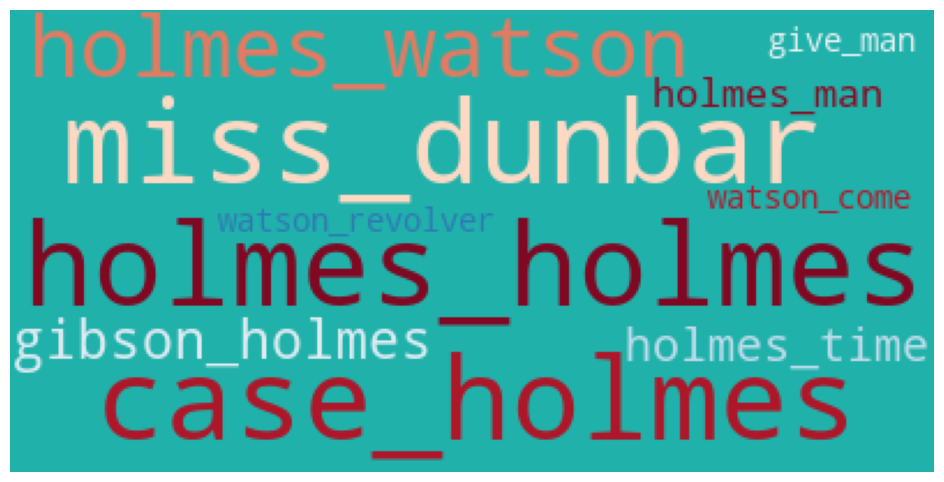

In [23]:
wordcloud = WordCloud( 
    
    background_color='LightSeaGreen', colormap='RdBu',
    #background_color='black', colormap='Greens',
    #background_color='black', colormap='Blues',
    
    stopwords        = stop_words,
    max_words        = Top_N,
    max_font_size    = 50,
    random_state     = 7 
    ).generate( str(Top_Corpus) ) 

fig = plt.figure(figsize=(13,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#####   

#####   

#####      
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Summary

In [24]:
# input
num_sentences = 2

# Calculate word frequencies
fdist = FreqDist(Top_Words)

# Assign scores to sentences based on word frequencies
sentences       = sent_tokenize(text)
sentence_scores = [sum(fdist[word] for word in word_tokenize(sentence.lower()) if word in fdist) for sentence in sentences]

# Create a list of tuples containing sentence index and score
sentence_scores = list(enumerate(sentence_scores))

# Sort sentences by scores in descending order
sorted_sentences = sorted(sentence_scores, key=lambda x: x[1], reverse=True)

# Choosing top `num_sentences` sentences for the summary
chosen_sentences = sorted_sentences[:num_sentences]

# Sort the randomly selected sentences based on their original order in the text
summary_sentences = sorted(chosen_sentences, key=lambda x: x[0])

# Create the summary
summary = '   * * * * *   '.join([sentences[i] for i, _ in summary_sentences])
summary

"On the other hand , Miss Dunbar , as I understand it , admits that she had made an appointment to meet Mrs. Gibson at the bridge .   * * * * *   You can let Mr. Gibson know that I will see him in the morning , when steps can be taken for Miss Dunbar 's vindication . ''"

#####   

#####   